In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('dataset.xlsx')

In [3]:
df.columns = df.iloc[0]

In [4]:
df = df[1:]

In [5]:
df.to_csv('dataset.xlsx')

In [6]:
df.head()

,Week,Total Sales,Offline Sales,Online Sales,TV Spend,Radio Spend,TV Ratings,Radio Impacts,Paid for Search Impressions,Paid for Brand Search Impressions,Paid for Generic Search Impressions,Rainfall Index,Temperature Index,Website Visits,Paid for Search Clicks,"""Acme Chocolate Bars"" Google Search Index","Generic ""Chocolate Bars"" Google Search Index",Facebook Active Users,Facebook Likes,Facebook Comments
1,2016-12-31 00:00:00,228120,208400,19720,0,34078.682933,0,30108163.066666,49594,5598,43996,1.662041,1.708945,0,0,26,55,945,96,2
2,2017-01-07 00:00:00,314670,287150,27520,0,118818.600109,0,104975001.366668,55200,6267,48933,2.131224,2.115776,0,0,25,40,427,94,2
3,2017-01-14 00:00:00,369860,327700,42160,0,118719.668651,0,104887596.450003,58391,6572,51819,1.85207,1.90095,0,0,35,53,309,118,3
4,2017-01-21 00:00:00,341540,302700,38840,0,1189.195279,0,1050641.7,36473,4341,32132,-0.51207,-0.293248,0,0,32,63,250,88,1
5,2017-01-28 00:00:00,424240,354800,69440,0,93954.75298,0,83008050.200002,44294,5651,38643,1.383615,1.438449,0,0,27,51,206,120,0


In [7]:
df.shape

(157, 20)

In [8]:
df.columns

Index(['Week', 'Total Sales', 'Offline Sales', 'Online Sales', 'TV Spend',
       'Radio Spend', 'TV Ratings', 'Radio Impacts',
       'Paid for Search Impressions', 'Paid for Brand Search Impressions',
       'Paid for Generic Search Impressions', 'Rainfall Index',
       'Temperature Index', 'Website Visits', 'Paid for Search Clicks',
       '"Acme Chocolate Bars" Google Search Index',
       'Generic "Chocolate Bars" Google Search Index', 'Facebook Active Users',
       'Facebook Likes', 'Facebook Comments'],
      dtype='object', name=0)

In [9]:
for i in df.columns:
    if i != 'Week':
        df[i] = df[i].astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 1 to 157
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Week                                          157 non-null    object 
 1   Total Sales                                   157 non-null    float64
 2   Offline Sales                                 157 non-null    float64
 3   Online Sales                                  157 non-null    float64
 4   TV Spend                                      157 non-null    float64
 5   Radio Spend                                   157 non-null    float64
 6   TV Ratings                                    157 non-null    float64
 7   Radio Impacts                                 157 non-null    float64
 8   Paid for Search Impressions                   157 non-null    float64
 9   Paid for Brand Search Impressions             157 non-null    flo

In [11]:
df.isnull().sum()

0
Week                                             0
Total Sales                                      0
Offline Sales                                    0
Online Sales                                     0
TV Spend                                         0
Radio Spend                                      0
TV Ratings                                       0
Radio Impacts                                    0
Paid for Search Impressions                      0
Paid for Brand Search Impressions                0
Paid for Generic Search Impressions              0
Rainfall Index                                   0
Temperature Index                                0
Website Visits                                  12
Paid for Search Clicks                           0
"Acme Chocolate Bars" Google Search Index        0
Generic "Chocolate Bars" Google Search Index     0
Facebook Active Users                            0
Facebook Likes                                   0
Facebook Comments            

In [12]:
# Rule of thumb: if you are removing <5% of the observations, you are free to just remove all that have MV
# here the 12 observations account for more than 5% (nearly 8%) so we replace mv with 0

df['Website Visits'] = df['Website Visits'].fillna(0)

In [13]:
# Ordinary least squares is invariant, while methods such as lasso or ridge regression are not. 
# So, for invariant methods there is no real need for standardization, 
# while for non-invariant methods you should probably standardize. 

In [14]:
df.describe()

,Total Sales,Offline Sales,Online Sales,TV Spend,Radio Spend,TV Ratings,Radio Impacts,Paid for Search Impressions,Paid for Brand Search Impressions,Paid for Generic Search Impressions,Rainfall Index,Temperature Index,Website Visits,Paid for Search Clicks,"""Acme Chocolate Bars"" Google Search Index","Generic ""Chocolate Bars"" Google Search Index",Facebook Active Users,Facebook Likes,Facebook Comments
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,1.570000e+02,1.570000e+02,157.000000,1.570000e+02,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,438465.987261,353261.146497,85204.840764,59294.447771,59959.259013,21.628025,5.297338e+07,3.344720e+05,21313.528662,3.131585e+05,1.697139,1.864649,13120.229299,5677.898089,33.566879,49.242038,2448.528662,381.789809,11.076433
std,119119.846502,88614.084189,34895.016866,112062.565313,51656.942405,41.492917,4.563837e+07,4.679043e+05,7934.327348,4.664222e+05,1.061959,1.045945,9720.382951,3176.845485,6.321792,7.790034,4813.891805,424.494677,23.800060
min,116920.000000,97800.000000,19120.000000,0.000000,0.000000,0.000000,0.000000e+00,3.647300e+04,4341.000000,2.665100e+04,-1.505364,-1.283743,0.000000,0.000000,20.000000,29.000000,78.000000,64.000000,0.000000
25%,362860.000000,299700.000000,59280.000000,0.000000,721.402919,0.000000,6.373520e+05,7.792800e+04,15423.000000,6.367200e+04,1.197784,1.342825,0.000000,3663.000000,29.000000,44.000000,162.000000,124.000000,1.000000
50%,412850.000000,337950.000000,77800.000000,0.000000,70918.651955,0.000000,6.265589e+07,1.893320e+05,20749.000000,1.659340e+05,1.891603,2.012160,16536.000000,6072.000000,33.000000,48.000000,313.000000,158.000000,3.000000
75%,497680.000000,401450.000000,107840.000000,66303.000000,106249.544224,24.700000,9.387037e+07,4.286620e+05,26938.000000,4.009400e+05,2.474140,2.678020,20680.000000,8328.000000,38.000000,53.000000,1795.000000,364.000000,10.000000
max,743160.000000,584200.000000,184920.000000,521445.500000,168445.646136,211.000000,1.488200e+08,3.821607e+06,47200.000000,3.807225e+06,4.417522,4.399682,29070.000000,11601.000000,49.000000,83.000000,25788.000000,1753.000000,166.000000


In [15]:
df[df['Total Sales'] == 743160]
# Saturday

,Week,Total Sales,Offline Sales,Online Sales,TV Spend,Radio Spend,TV Ratings,Radio Impacts,Paid for Search Impressions,Paid for Brand Search Impressions,Paid for Generic Search Impressions,Rainfall Index,Temperature Index,Website Visits,Paid for Search Clicks,"""Acme Chocolate Bars"" Google Search Index","Generic ""Chocolate Bars"" Google Search Index",Facebook Active Users,Facebook Likes,Facebook Comments
128,2019-06-08 00:00:00,743160.0,584200.0,158960.0,365893.2,121104.608333,147.3,1.069947e+08,550678.0,34695.0,515983.0,1.486093,1.834003,27026.0,11601.0,44.0,47.0,2693.0,1059.0,11.0


In [16]:
df[df['Total Sales'] == 116920]
# a day before Christmas Eve

,Week,Total Sales,Offline Sales,Online Sales,TV Spend,Radio Spend,TV Ratings,Radio Impacts,Paid for Search Impressions,Paid for Brand Search Impressions,Paid for Generic Search Impressions,Rainfall Index,Temperature Index,Website Visits,Paid for Search Clicks,"""Acme Chocolate Bars"" Google Search Index","Generic ""Chocolate Bars"" Google Search Index",Facebook Active Users,Facebook Likes,Facebook Comments
52,2017-12-23 00:00:00,116920.0,97800.0,19120.0,0.0,0.0,0.0,0.0,257404.0,10366.0,247038.0,1.27277,1.300192,0.0,2623.0,24.0,55.0,157.0,129.0,2.0


In [17]:
off = df['Offline Sales'].sum()

In [18]:
on = df['Online Sales'].sum()

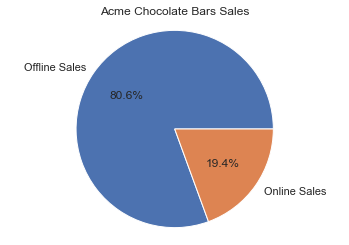

In [19]:
my_data = [off, on]
my_labels = 'Offline Sales','Online Sales'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Acme Chocolate Bars Sales')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Week', ylabel='Total Sales'>

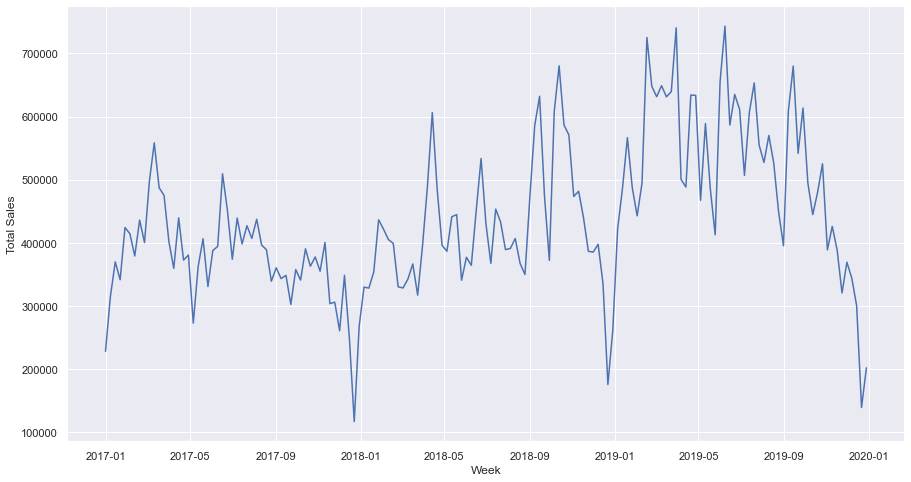

In [20]:
plt.figure(figsize = (15, 8))
sns.lineplot(x = 'Week', y = 'Total Sales', data = df)

Removing outliers

In [21]:
q = df['TV Spend'].quantile(0.90)
data_1 = df[df['TV Spend']<q]

In [22]:
q = data_1['Paid for Search Impressions'].quantile(0.99)
data_2 = data_1[data_1['Paid for Search Impressions']<q]

In [23]:
df_no_out = data_2.reset_index(drop=True)

In [24]:
X = df_no_out[[i for i in df_no_out.columns[4:]]]

Checking for <b>multicollinearity using Pearson Correlation

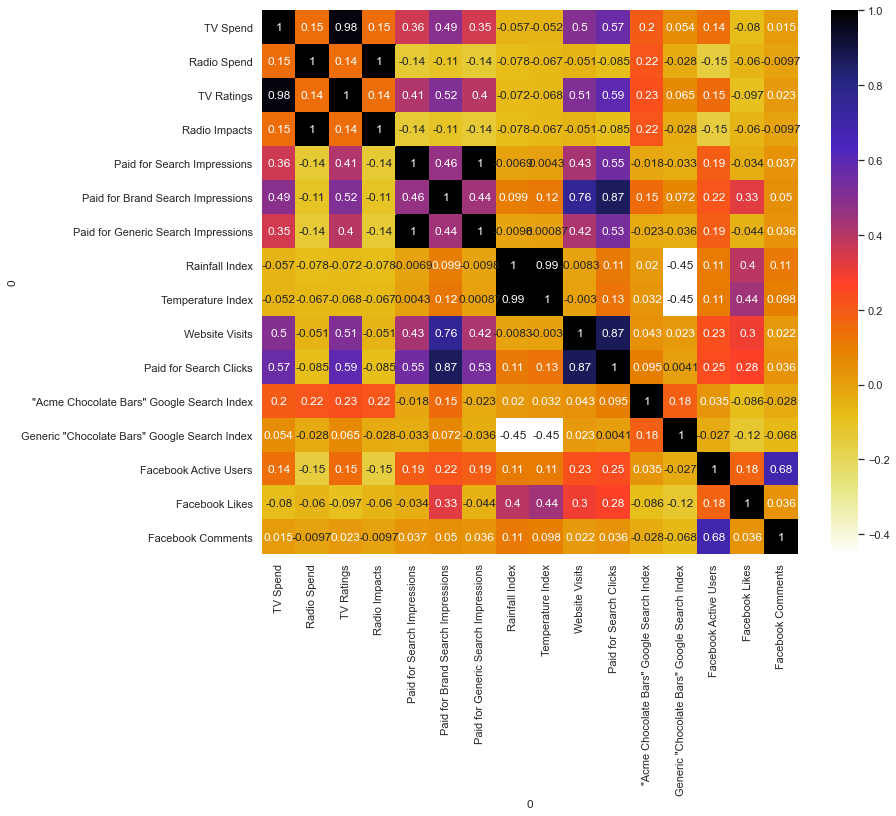

In [25]:
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [26]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [27]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

6

In [28]:
corr_features

{'Paid for Generic Search Impressions',
 'Paid for Search Clicks',
 'Radio Impacts',
 'TV Ratings',
 'Temperature Index',
 'Website Visits'}

In [29]:
X_no_corr = X.drop(corr_features,axis=1)

In [30]:
X_no_corr.columns.values

array(['TV Spend', 'Radio Spend', 'Paid for Search Impressions',
       'Paid for Brand Search Impressions', 'Rainfall Index',
       '"Acme Chocolate Bars" Google Search Index',
       'Generic "Chocolate Bars" Google Search Index',
       'Facebook Active Users', 'Facebook Likes', 'Facebook Comments'],
      dtype=object)

<b>Linearity<b>

In [31]:
log_sales = np.log(1+df_no_out['Total Sales'])

C:\Users\danek\anaconda3.64\envs\py3-TF2.0\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


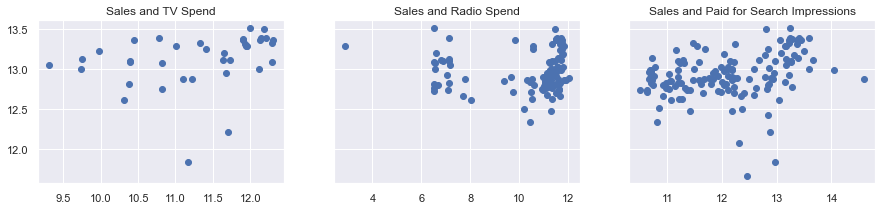

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(np.log((X_no_corr['TV Spend'])), log_sales)
ax1.set_title('Sales and TV Spend')
ax2.scatter(np.log(X_no_corr['Radio Spend']), log_sales)
ax2.set_title('Sales and Radio Spend')
ax3.scatter(np.log(1+X_no_corr['Paid for Search Impressions']), log_sales)
ax3.set_title('Sales and Paid for Search Impressions')


plt.show()

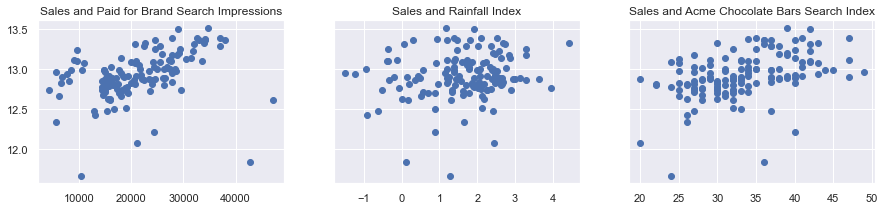

In [33]:
f, (ax4, ax5, ax6) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax4.scatter((X_no_corr['Paid for Brand Search Impressions']), log_sales)
ax4.set_title('Sales and Paid for Brand Search Impressions')
ax5.scatter((X_no_corr['Rainfall Index']), log_sales)
ax5.set_title('Sales and Rainfall Index')
ax6.scatter((X_no_corr['"Acme Chocolate Bars" Google Search Index']), log_sales)
ax6.set_title('Sales and Acme Chocolate Bars Search Index')


plt.show()

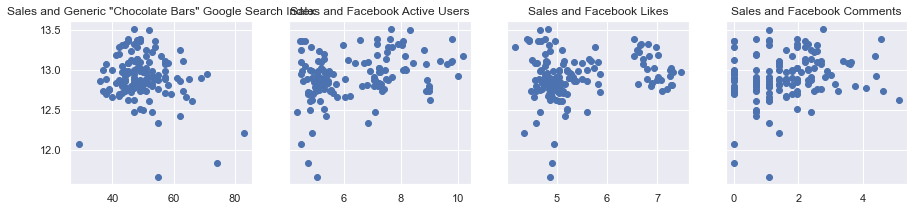

In [34]:
f, (ax7, ax8, ax9, ax10) = plt.subplots(1, 4, sharey=True, figsize=(15,3))
ax7.scatter((X_no_corr['Generic "Chocolate Bars" Google Search Index']), log_sales)
ax7.set_title('Sales and Generic "Chocolate Bars" Google Search Index')
ax8.scatter(np.log(1+X_no_corr['Facebook Active Users']), log_sales)
ax8.set_title('Sales and Facebook Active Users')
ax9.scatter(np.log(1+X_no_corr['Facebook Likes']), log_sales)
ax9.set_title('Sales and Facebook Likes')
ax10.scatter(np.log(1+X_no_corr['Facebook Comments']), log_sales)
ax10.set_title('Sales and Facebook Comments')

plt.show()

In [35]:
X_no_corr.columns.values

array(['TV Spend', 'Radio Spend', 'Paid for Search Impressions',
       'Paid for Brand Search Impressions', 'Rainfall Index',
       '"Acme Chocolate Bars" Google Search Index',
       'Generic "Chocolate Bars" Google Search Index',
       'Facebook Active Users', 'Facebook Likes', 'Facebook Comments'],
      dtype=object)

In [36]:
X_no_corr['TV Spend'] = np.log(1+X_no_corr['TV Spend'])
X_no_corr['Radio Spend'] = np.log(1+X_no_corr['Radio Spend'])
X_no_corr['Paid for Search Impressions'] = np.log(1+X_no_corr['Paid for Search Impressions'])
# X_no_corr['Paid for Brand Search Impressions'] = np.log(1+ X_no_corr['Paid for Brand Search Impressions'])
# X_no_corr['Rainfall Index'] = np.log(X_no_corr['Rainfall Index'])
# X_no_corr['"Acme Chocolate Bars" Google Search Index'] = np.log(1+X_no_corr['"Acme Chocolate Bars" Google Search Index'])
# X_no_corr['Generic "Chocolate Bars" Google Search Index'] = np.log(1+X_no_corr['Generic "Chocolate Bars" Google Search Index'])
X_no_corr['Facebook Active Users'] = np.log(1+X_no_corr['Facebook Active Users'])
X_no_corr['Facebook Likes'] = np.log(1+X_no_corr['Facebook Likes'])
X_no_corr['Facebook Comments'] = np.log(1+X_no_corr['Facebook Comments'])

In [37]:
y = np.log(1+ df_no_out['Total Sales'])
x1 = (X_no_corr)

In [38]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     14.50
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           6.10e-17
Time:                        17:01:17   Log-Likelihood:                 29.933
No. Observations:                 139   AIC:                            -37.87
Df Residuals:                     128   BIC:                            -5.587
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           11.7520      0.376     31.277      0.000      11.009      12.495
TV Spend                                         0.0168      0.005      3.542      0.001       0.007       0.026
Radio Spend                                      0.0172      0.004      4.269      0.000       0.009       0.025
Paid for Search Impressions                      0.0302      0.026      1.145      0.254      -0.022       0.082
Paid for Brand Search Impressions             2.317e-06   3.54e-06      0.655      0.513   -4.68e-06    9.31e-06
Rainfall Index                                  -0.0063      0.020     -0.309      0.757      -0.046       0.034
"Acme Chocolate Bars" Google Search Index        0.0174      0.003      5.638      0.000       0.011       0.024
Generic "Chocolate Bars" Google Search Index    -0.0092      0.003     -3.537      0.001      -0.014      -0.004
Facebook Active Users                            0.0288      0.017      1.688      0.094      -0.005       0.063
Facebook Likes                                   0.0480      0.026      1.852      0.066      -0.003       0.099
Facebook Comments                                0.0078      0.021      0.372      0.711      -0.034       0.049
==============================================================================
Omnibus:                       46.877   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.466
Skew:                          -1.322   Prob(JB):                     3.45e-28
Kurtosis:                       6.853   Cond. No.                     4.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Durbin-Watson: values below 1 and above 3 are a couse for alarm

In [ ]:
# OLS - the method estimates the relationship by minimizing the sum of the squares
# in the difference between the observed and predicted values 

In [39]:
y_pred = results.predict(x)

In [40]:
residual = y - y_pred

In [41]:
ssr = results.ssr

<b>Normality of Residual<b>

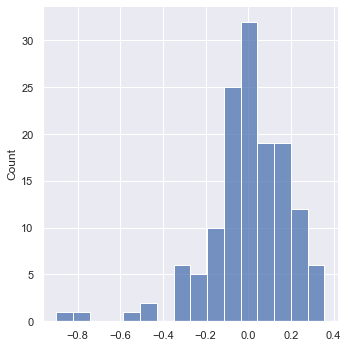

In [42]:
sns.displot(residual)

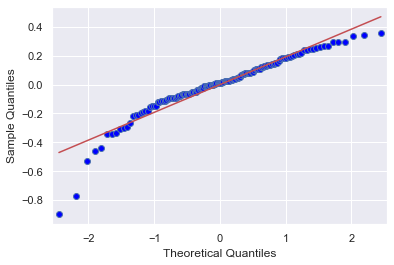

In [43]:
sm.qqplot(residual, line = "r")
plt.show()

In [44]:
np.mean(residual)

1.8007018737819588e-12

<b>Homoscedasticity<b>

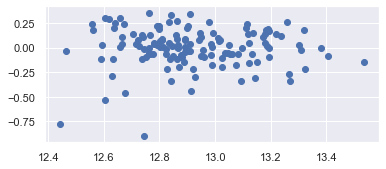

In [45]:
f, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(y_pred, residual)

In [46]:
# No patters here so we're safe
# The overall distribution is Randomly Sampled

In [47]:
X_no_radio_spend = X_no_corr.drop('Radio Spend', axis=1)

In [48]:
y = np.log(1+df_no_out['Total Sales'])
x1 = (X_no_radio_spend)

In [49]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     12.42
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           4.96e-14
Time:                        17:01:20   Log-Likelihood:                 20.681
No. Observations:                 139   AIC:                            -21.36
Df Residuals:                     129   BIC:                             7.983
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           12.1677      0.386     31.492      0.000      11.403      12.932
TV Spend                                         0.0192      0.005      3.832      0.000       0.009       0.029
Paid for Search Impressions                      0.0095      0.028      0.344      0.731      -0.045       0.064
Paid for Brand Search Impressions             1.354e-06   3.76e-06      0.361      0.719   -6.08e-06    8.79e-06
Rainfall Index                                  -0.0181      0.021     -0.850      0.397      -0.060       0.024
"Acme Chocolate Bars" Google Search Index        0.0203      0.003      6.341      0.000       0.014       0.027
Generic "Chocolate Bars" Google Search Index    -0.0107      0.003     -3.875      0.000      -0.016      -0.005
Facebook Active Users                            0.0282      0.018      1.551      0.123      -0.008       0.064
Facebook Likes                                   0.0469      0.028      1.701      0.091      -0.008       0.101
Facebook Comments                                0.0005      0.022      0.023      0.982      -0.043       0.044
==============================================================================
Omnibus:                       62.124   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.612
Skew:                          -1.640   Prob(JB):                     5.08e-51
Kurtosis:                       8.407   Cond. No.                     4.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
ssr_no_radio = results.ssr

In [51]:
(ssr_no_radio - ssr)/ssr_no_radio*100

12.464113433517129

In [52]:
df['Total Sales'].sum()

68839160.0

In [53]:
(ssr_no_radio - ssr)/ssr_no_radio*df['Total Sales'].sum()

8580190.98908035

In [54]:
X_no_tv_spend = X_no_corr.drop('TV Spend', axis=1)

In [55]:
y = np.log(1+df_no_out['Total Sales'])
x1 = (X_no_tv_spend)

In [56]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     13.50
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           4.47e-15
Time:                        17:01:20   Log-Likelihood:                 23.434
No. Observations:                 139   AIC:                            -26.87
Df Residuals:                     129   BIC:                             2.476
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           11.5373      0.387     29.807      0.000      10.772      12.303
Radio Spend                                      0.0189      0.004      4.527      0.000       0.011       0.027
Paid for Search Impressions                      0.0489      0.027      1.814      0.072      -0.004       0.102
Paid for Brand Search Impressions             7.982e-06   3.29e-06      2.426      0.017    1.47e-06    1.45e-05
Rainfall Index                                  -0.0034      0.021     -0.159      0.874      -0.045       0.038
"Acme Chocolate Bars" Google Search Index        0.0178      0.003      5.522      0.000       0.011       0.024
Generic "Chocolate Bars" Google Search Index    -0.0087      0.003     -3.188      0.002      -0.014      -0.003
Facebook Active Users                            0.0325      0.018      1.826      0.070      -0.003       0.068
Facebook Likes                                   0.0185      0.026      0.723      0.471      -0.032       0.069
Facebook Comments                                0.0075      0.022      0.344      0.732      -0.036       0.051
==============================================================================
Omnibus:                       37.422   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.536
Skew:                          -1.103   Prob(JB):                     1.62e-19
Kurtosis:                       6.174   Cond. No.                     4.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
ssr_no_tv = results.ssr

In [58]:
(ssr_no_tv - ssr)/ssr_no_tv*100

8.926572156618224

In [59]:
df['Total Sales'].sum()

68839160.0

In [60]:
(ssr_no_tv - ssr)/ssr_no_tv*df['Total Sales'].sum()

6144977.28940987

In [61]:
y = np.log(1+ df_no_out['Total Sales'])
x1 = (X_no_corr[['TV Spend','Radio Spend','"Acme Chocolate Bars" Google Search Index', 'Generic "Chocolate Bars" Google Search Index']])

In [62]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     26.21
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           4.61e-16
Time:                        17:01:21   Log-Likelihood:                 17.471
No. Observations:                 139   AIC:                            -24.94
Df Residuals:                     134   BIC:                            -10.27
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           12.6602      0.146     86.858      0.000      12.372      12.948
TV Spend                                         0.0224      0.004      5.998      0.000       0.015       0.030
Radio Spend                                      0.0121      0.004      2.973      0.003       0.004       0.020
"Acme Chocolate Bars" Google Search Index        0.0183      0.003      5.747      0.000       0.012       0.025
Generic "Chocolate Bars" Google Search Index    -0.0104      0.002     -4.293      0.000      -0.015      -0.006
==============================================================================
Omnibus:                       47.896   Durbin-Watson:                   0.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.196
Skew:                          -1.328   Prob(JB):                     2.66e-30
Kurtosis:                       7.057   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""